# Visualize Augmentations Transformations

## Imports

In [77]:
# Importing essential libraries
import os, sys
import numpy as np
import matplotlib.pyplot as plt

# Importing image processing libraries
from PIL import Image
import torchvision.transforms as T
from torchvision.transforms import functional as F


# Add the parent directory of the current script to the system path.
sys.path.insert(0, os.pardir)

# ttach lib
import ttach as tta

## Visualize TTA

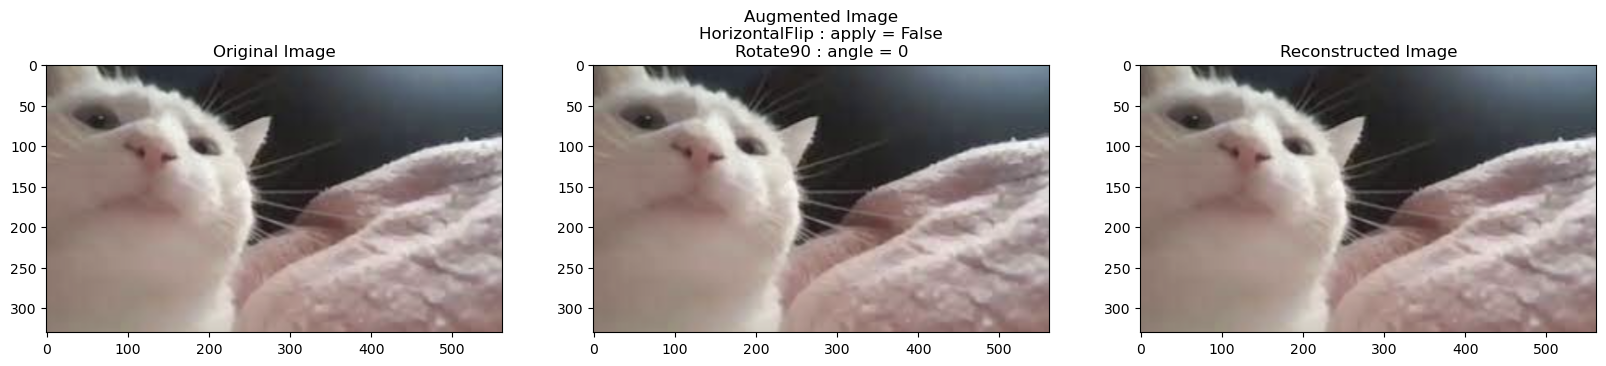

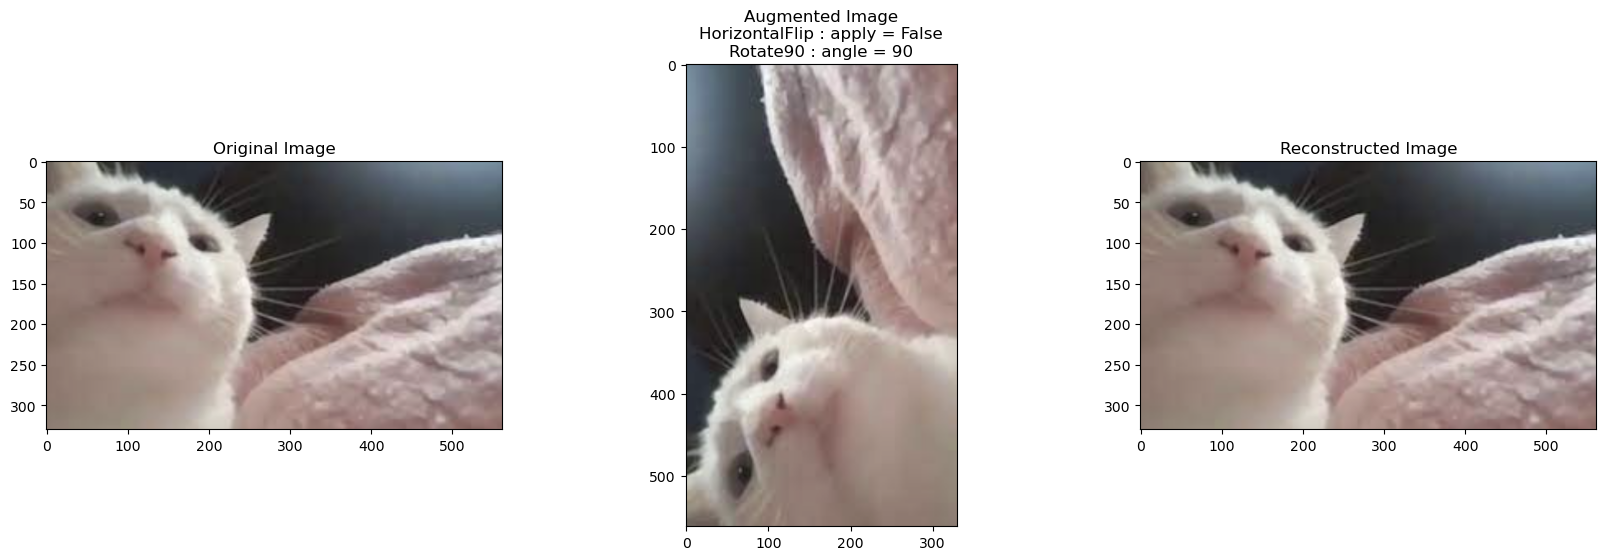

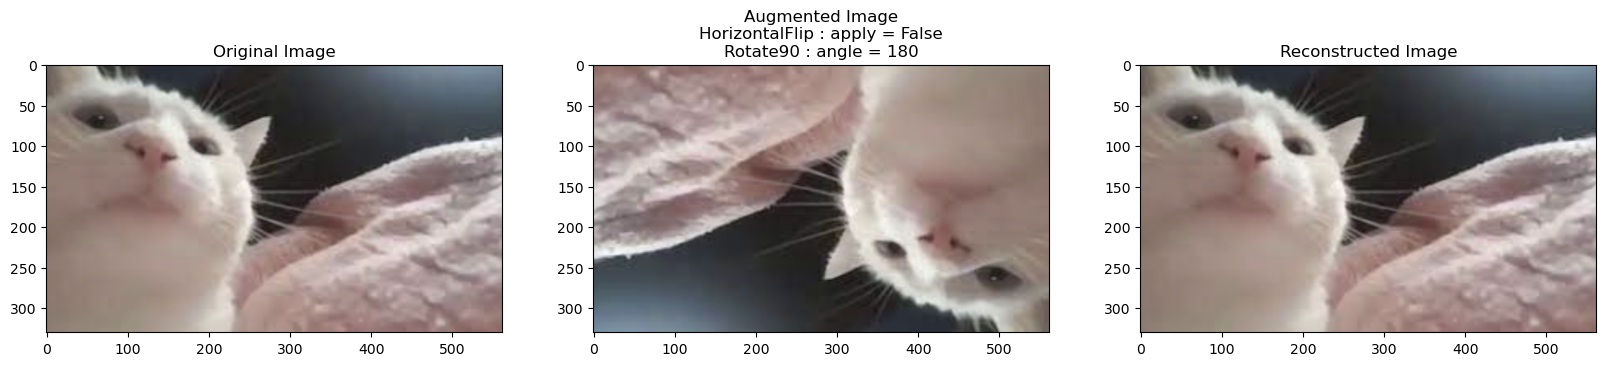

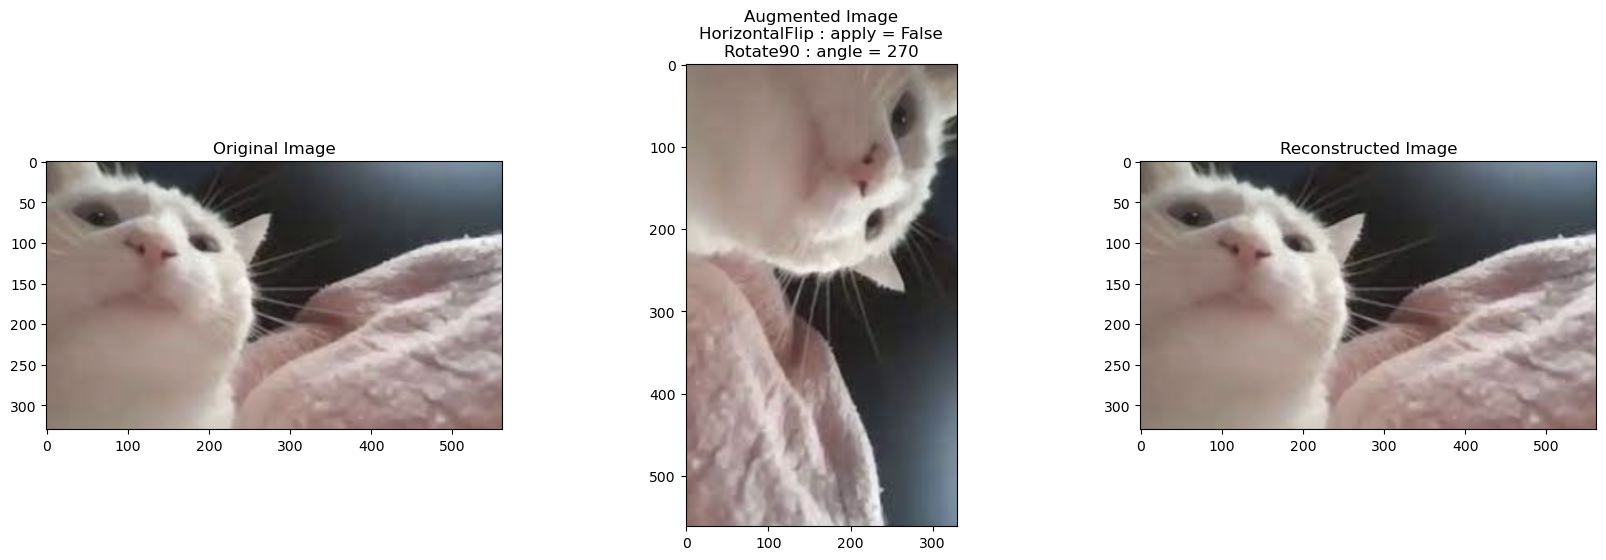

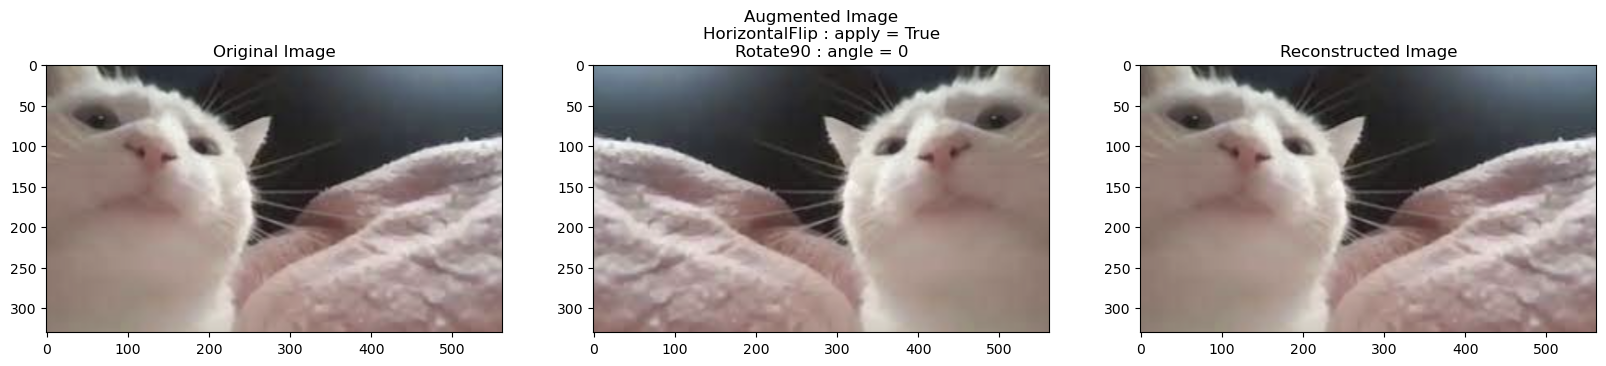

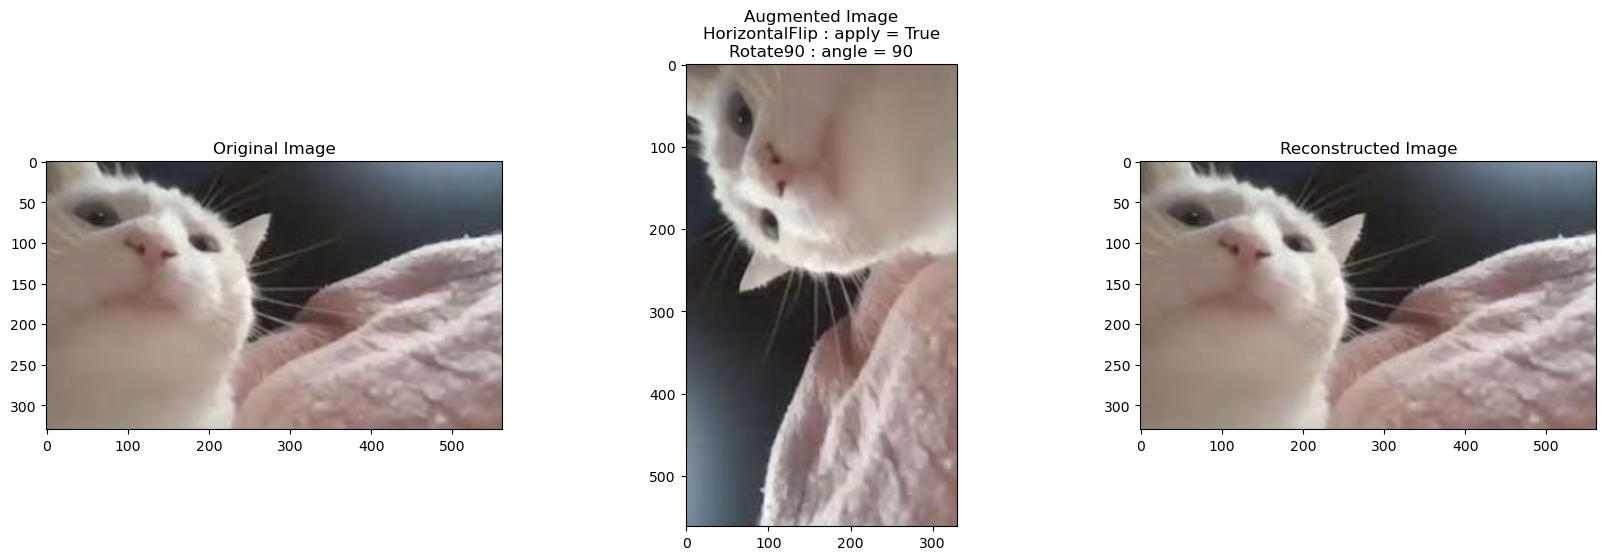

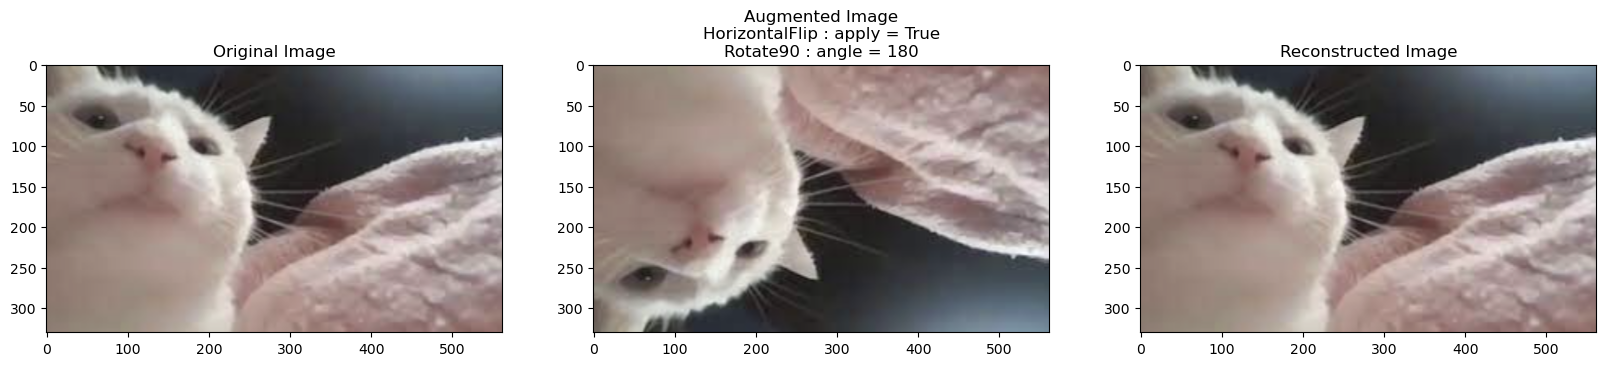

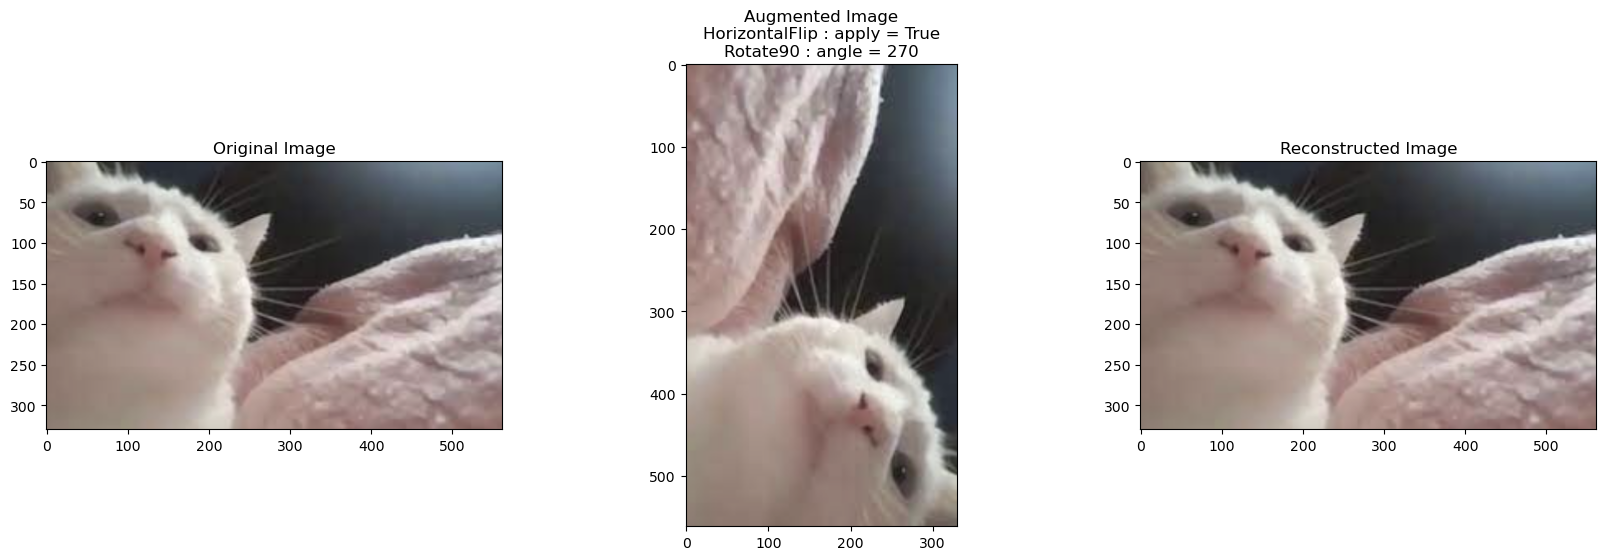

In [78]:
# Define a transformation to convert PIL images to tensors
to_tensor = T.Compose([T.ToTensor()])

# Open the image file with PIL, then apply the transformation
image = Image.open(os.path.join("assets", "vibin_cat.png"))

# Transform the image to a tensor and add an extra dimension to make it a 4D tensor (B, C, H, W)
image = to_tensor(image).unsqueeze(dim=0)

# Initialize the ttach transformations (alias 'd4_transform' creates a list of common TTA)
transforms = tta.aliases.d4_transform()

# Retrieve the names and parameters of the transformations for display purposes
transforms_names_and_params = tta.utils.get_transform_names_and_params(transforms)
         
for i, transformer in enumerate(transforms):
    
    # augment image
    augmented_image = transformer.augment_image(image)
    
    # deaugment image
    deaugmented_image = transformer.deaugment_mask(augmented_image)

    # plot original and augmented images
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    # Preparing the original image for display
    # 'numpy()' converts the image from a tensor to a numpy array
    # 'squeeze()' removes singleton dimensions
    # 'transpose((1, 2, 0))' rearranges dimensions from (C, H, W) to (H, W, C) which is the standard format for display
    image_display = image.numpy().squeeze().transpose((1, 2, 0))
    image_display = np.clip(image_display, 0, 1)

    aug_image_display = augmented_image.numpy().squeeze().transpose((1, 2, 0))
    aug_image_display = np.clip(aug_image_display, 0, 1)
    
    deaug_image_display = deaugmented_image.numpy().squeeze().transpose((1, 2, 0))
    deaug_image_display = np.clip(deaug_image_display, 0, 1)

    ax[0].imshow(image_display)
    ax[0].title.set_text('Original Image')

    ax[1].imshow(aug_image_display)
    ax[1].title.set_text(f'Augmented Image\n{transforms_names_and_params[i]}')  # Add augmentation details to the title


    ax[2].imshow(deaug_image_display)
    ax[2].title.set_text(f'Reconstructed Image')

    plt.show()
    

